In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

In [12]:
data=['seconds','mic (trachea)','abdominal movement (stretch sensor)','thorax movement (stretch sensor)']
data_test=['seconds','thorax movement (stretch sensor)','abdominal movement (stretch sensor)','mic (right of trachea)','mic 2 (left of trachea)','mic (trachea)',]

In [13]:
x = np.load('overnight_all_compressed.npz')

In [14]:
start_time = time.clock()
#for files in x:
overnight_file1 = pd.DataFrame(x['arr_0'], columns = data)
overnight_file2 = pd.DataFrame(x['arr_1'], columns = data)
overnight_file3 = pd.DataFrame(x['arr_2'], columns = data_test)
print(time.clock() - start_time, "seconds")

3.8770529214216367 seconds


In [15]:
overnight_file1['abdominal movement (stretch sensor)'].describe()

count    1.104451e+07
mean     1.639117e+00
std      6.235855e-01
min      7.251770e-01
25%      8.131990e-01
50%      2.105514e+00
75%      2.123518e+00
max      4.096000e+00
Name: abdominal movement (stretch sensor), dtype: float64

In [16]:
overnight_file1['thorax movement (stretch sensor)'].describe()

count    1.104451e+07
mean     1.873893e+00
std      3.006289e-01
min      6.271530e-01
25%      1.813443e+00
50%      2.025495e+00
75%      2.039498e+00
max      2.333570e+00
Name: thorax movement (stretch sensor), dtype: float64

In [17]:
overnight_file1['mic (trachea)'].describe()

count    1.104451e+07
mean     1.247501e+00
std      4.024806e-02
min      7.002000e-03
25%      1.227300e+00
50%      1.247305e+00
75%      1.267309e+00
max      4.083997e+00
Name: mic (trachea), dtype: float64

In [18]:
def get_a_sample(interval,start):
    samplingFrequency=1000
    sample = overnight_file1[:][start*samplingFrequency:samplingFrequency*(start+interval)]
    
    return sample

In [19]:
#get_a_sample(2,5600)['mic (trachea)'] # to get x_
#print(x)
sample = get_a_sample(30,68)
x_train = sample['mic (trachea)']
y_train_thrx =sample['thorax movement (stretch sensor)']
y_train_abd = sample['abdominal movement (stretch sensor)']
sec_train = sample['seconds']
X_test=get_a_sample(2,780)[['abdominal movement (stretch sensor)','mic (trachea)']]
y_test_thrx = get_a_sample(2,780)['thorax movement (stretch sensor)']
y_test_abd = get_a_sample(2,780)['abdominal movement (stretch sensor)']
sec_test=get_a_sample(2,780)['seconds']

sample['abdominal movement (stretch sensor)'].describe()

count    30000.000000
mean         2.112971
std          0.112177
min          1.315321
25%          2.107515
50%          2.139522
75%          2.149525
max          4.096000
Name: abdominal movement (stretch sensor), dtype: float64

In [20]:
sample['thorax movement (stretch sensor)'].describe()

count    30000.000000
mean         1.226763
std          0.307675
min          0.939229
25%          0.985241
50%          1.035253
75%          1.483362
max          2.103513
Name: thorax movement (stretch sensor), dtype: float64

In [21]:
sample['mic (trachea)'].describe()

count    30000.000000
mean         1.245028
std          0.111613
min          0.009002
25%          1.211296
50%          1.245304
75%          1.281313
max          2.039498
Name: mic (trachea), dtype: float64

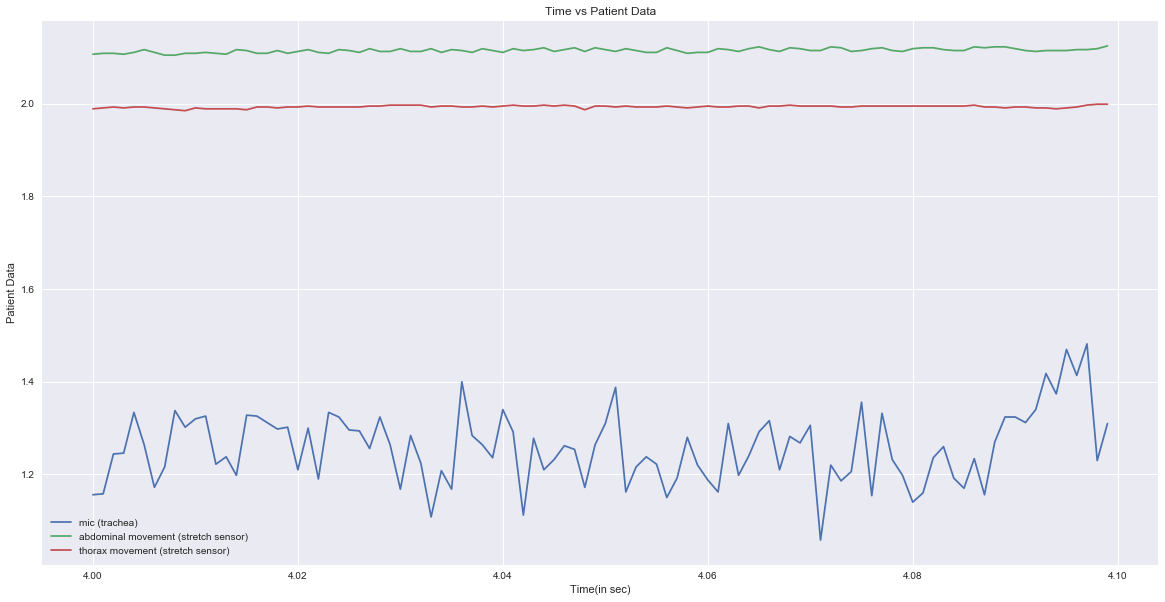

In [22]:
#Plot graph based on time interval(interval length in sec,start time in sec)

def plotOvernightData(interval,start):
    samplingFrequency=1000
    i=int(start*samplingFrequency)
    j=int(samplingFrequency*(start+interval))
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Time vs Patient Data')
    ax.set_xlabel('Time(in sec)')
    ax.set_ylabel('Patient Data')
    ax.plot(overnight_file1['seconds'][i:j],overnight_file1['mic (trachea)'][i:j],label='mic (trachea)')
    ax.plot(overnight_file1['seconds'][i:j],overnight_file1['abdominal movement (stretch sensor)'][i:j],label='abdominal movement (stretch sensor)')
    ax.plot(overnight_file1['seconds'][i:j],overnight_file1['thorax movement (stretch sensor)'][i:j],label='thorax movement (stretch sensor)')

    ax.legend()
    
plotOvernightData(0.1,4)

In [23]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print(X_test.shape)
print(y_test.shape)
# Plot outputs
plt.scatter(sec_test, y_test,  color='black')
plt.plot(sec_test, y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'y_train' is not defined

In [ ]:
day1 = x['arr_0']

NameError: name 'day1' is not defined

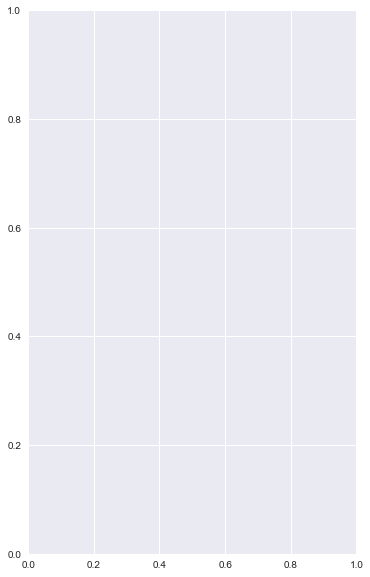

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1)
ax.boxplot(day1[:1],notch=True, bootstrap=1000)
ax.set_ylim(-0.1,2.2)
ax.set_xlabel('mic (trachea)')
ax.set_ylabel('Data Distribution')

ax = fig.add_subplot(1,3,2)
ax.boxplot(day1[:2],notch=True, bootstrap=1000)
ax.set_ylim(-0.1,2.2)
ax.set_xlabel('abdominal movement (stretch sensor)')
ax.set_ylabel('Data Distribution')

ax = fig.add_subplot(1,3,3)
ax.boxplot(day1[:3],notch=True, bootstrap=1000)
ax.set_ylim(-0.1,2.2)
ax.set_xlabel('thorax movement (stretch sensor)')
ax.set_ylabel('Data Distribution')

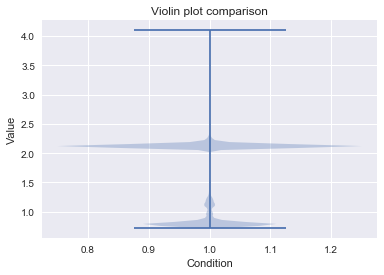

In [11]:
x = day1[:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.violinplot([x])
ax.set_xlabel("Condition")
ax.set_ylabel("Value")
ax.set_title("Violin plot comparison")

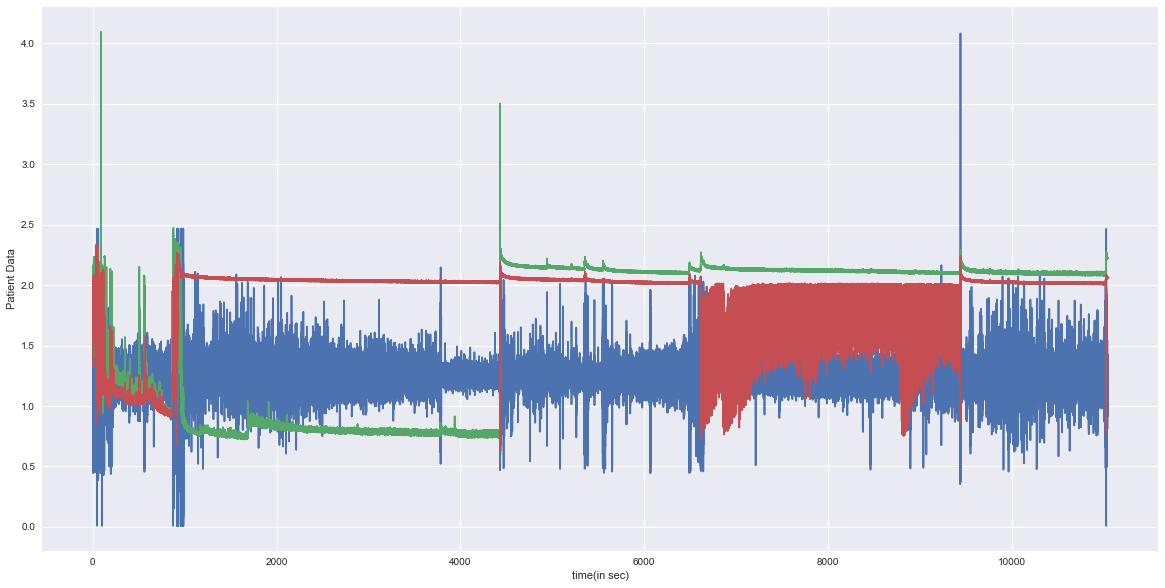

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(day1[:,0],day1[:,1],label='mic (trachea)')
ax.plot(day1[:,0],day1[:,2],label='abdominal movement (stretch sensor)')
ax.plot(day1[:,0],day1[:,3],label='thorax movement (stretch sensor)')
#ax.set_xlim(0,100,1000)
ax.set_ylabel('Patient Data')
ax.set_xlabel('time(in sec)')

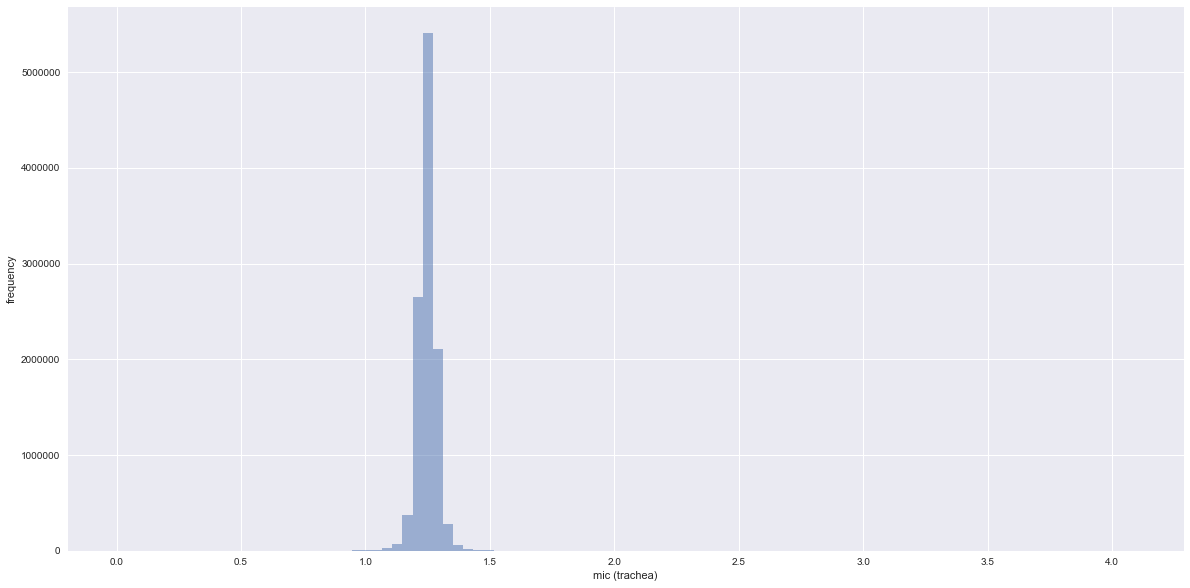

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.hist(overnight_file1['mic (trachea)'],100,alpha=0.5,label='mic')
ax.set_ylabel('frequency')
ax.set_xlabel('mic (trachea)')
plt.show()

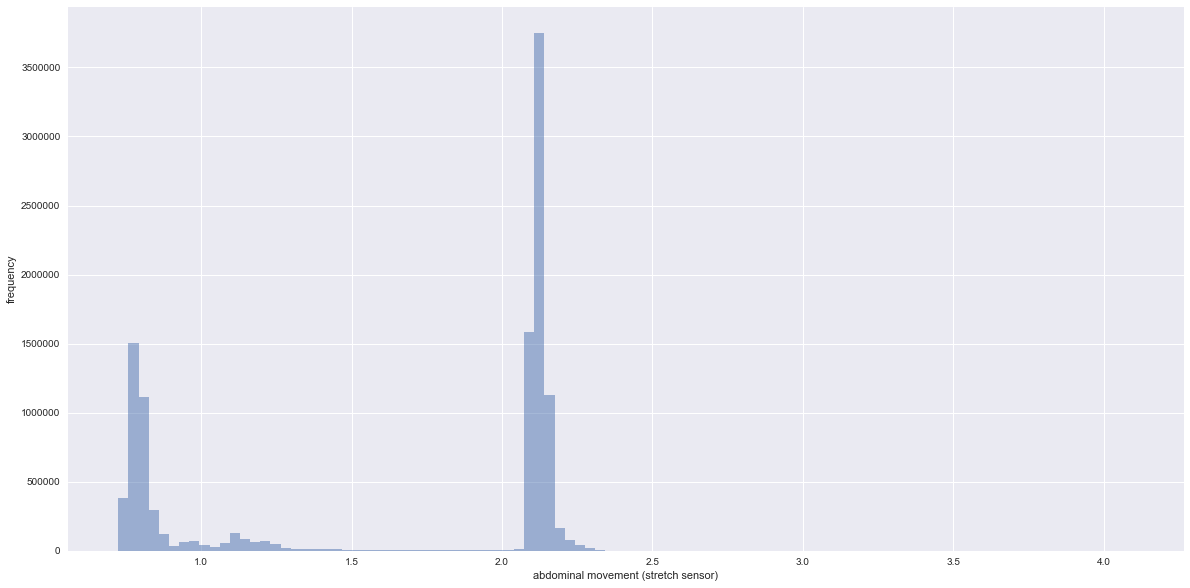

In [32]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.hist(overnight_file1['abdominal movement (stretch sensor)'],100,alpha=0.5,label='mic')
ax.set_ylabel('frequency')
ax.set_xlabel('abdominal movement (stretch sensor)')
plt.show()

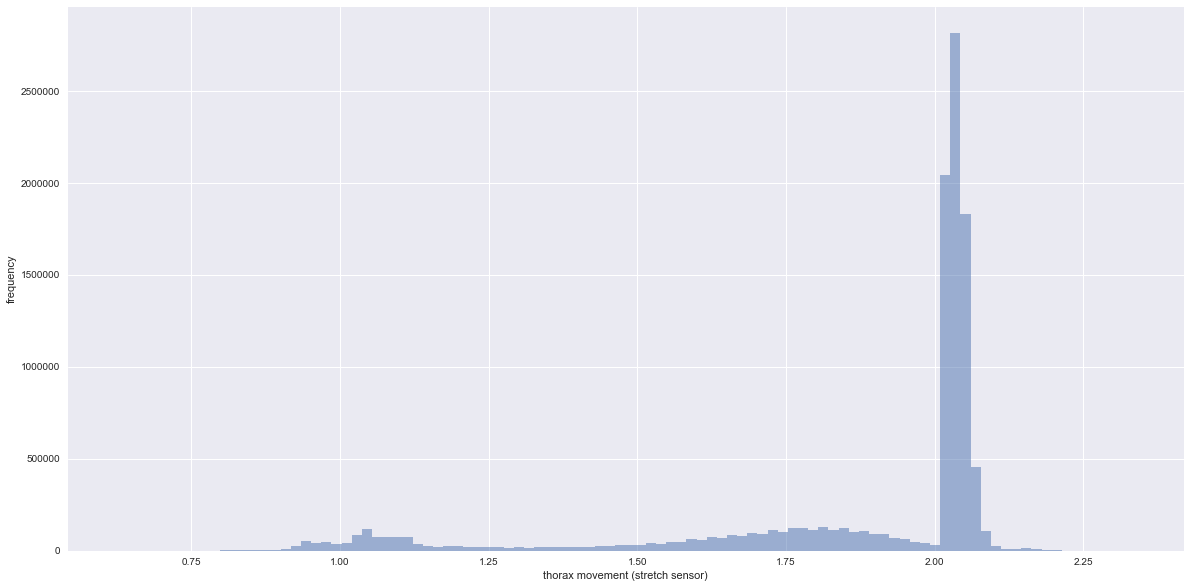

In [33]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.hist(overnight_file1['thorax movement (stretch sensor)'],100,alpha=0.5,label='mic')
ax.set_ylabel('frequency')
ax.set_xlabel('thorax movement (stretch sensor)')
plt.show()

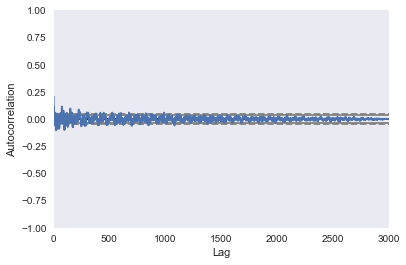

In [64]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(get_a_sample(3,800)[['mic (trachea)']])




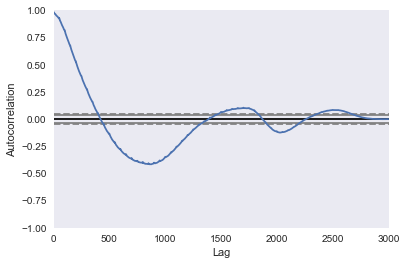

In [65]:
autocorrelation_plot(get_a_sample(3,900)['abdominal movement (stretch sensor)'])

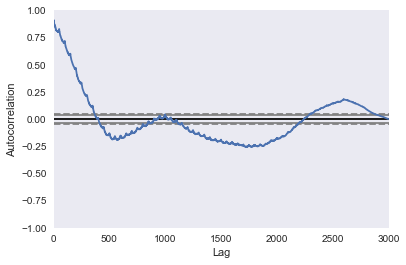

In [66]:
autocorrelation_plot(get_a_sample(3,0)['thorax movement (stretch sensor)'])

In [51]:
from pandas.plotting import 

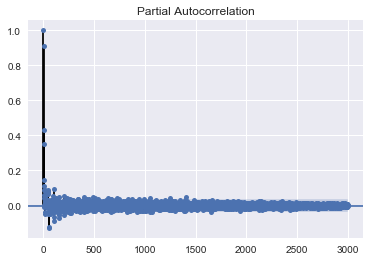

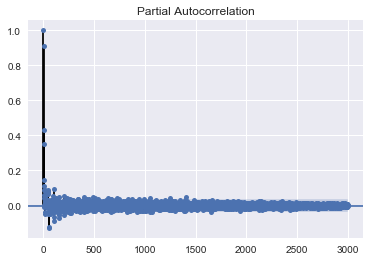

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(get_a_sample(3,0)['thorax movement (stretch sensor)'])